# Collecting Melbourne housing price by BeautifulSoup
> In this tutorial we will scrap housing price in Melbourne.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

In this tutorial we will scrap housing price in Melbourne from this web site: https://www.domain.com.au/auction-results/melbourne/

#### Required python packages
> We need urllib for connect to the website, and BeautifulSoup for parsing html sources.
> After that, the data can be stored in a json file.

In [28]:
# Load python packages
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [17]:
# Define functions for parsing and collecting data

def getListings(url):
    "Get a list of auction results"
    try:
        html = urlopen(url)
    except HTTPError as e:
        return None    
    try:
        # Parsing data
        bs = BeautifulSoup(html.read(), 'html.parser')
        articles = bs.findAll('article', {'class':'css-3xqrp1'})
        for atc in articles:
            for c in atc.children:
                if c.name == 'header':
                    suburb = c.h3.text
                if c.name == 'ul':
                    getListing(c, suburb)
    except AttributeError as e:
        return None
    
def getListing(tag, suburb=None):
    " Get a list in each suburb "
    ladd,lagen,htype,hInfo,soldInfo,price = tuple(["Unknown" for i in range(6)])
    listing = list(tag.children)
    ladd  = listing[0].text
    if listing[1].name == 'li':
        htype,hInfo = getHouseInfo(listing[1])
    if listing[2].name == 'li':
        soldInfo,price = getSoldInfo(listing[2])
    if listing[3].name == 'li':
        lagen = listing[3].text
    listings.append( {'suburb':suburb, 'street':ladd, 'agent':lagen, 'type': htype, 'info': hInfo, 
                      'sold':soldInfo, 'price':price})
    
def getSoldInfo(tag):
    sold = list(tag.children)
    if len(sold) >= 2: return sold[0].text, sold[1].text
    else: return sold[0].text, "Unknown"

def getHouseInfo(tag):
    house = list(tag.children)
    if len(house) >= 2: return house[0].text, house[1].text
    else: return house[0].text, "Unknown"

In [18]:
listings = [] # Store all listings
url = "https://www.domain.com.au/auction-results/melbourne/"
getListings(url)

#### Check results

In [19]:
# Number of listings
len(listings)

637

In [20]:
# Show first five listings
listings[1:5]

[{'suburb': 'Abbotsford',
  'street': '1/47 Nicholson St',
  'agent': 'Biggin & Scott Richmond',
  'type': 'Townhouse',
  'info': '2 beds',
  'sold': 'Sold prior to auction',
  'price': '$1.12m'},
 {'suburb': 'Abbotsford',
  'street': '12 Paterson St',
  'agent': 'Biggin & Scott Richmond',
  'type': 'House',
  'info': '4 beds',
  'sold': 'Sold',
  'price': '$1.886m'},
 {'suburb': 'Abbotsford',
  'street': '4 Turner St',
  'agent': 'Jellis Craig Fitzroy',
  'type': 'House',
  'info': '3 beds',
  'sold': 'Sold',
  'price': 'Price withheld'},
 {'suburb': 'Airport West',
  'street': '2/74 Fraser St',
  'agent': 'Barry Plant Essendon',
  'type': 'Unit',
  'info': '3 beds',
  'sold': 'Sold prior to auction',
  'price': '$671.5k'}]

#### Store results

In [21]:
# Store into a json file for further analysis
with open('listings.json', 'w') as f:
    json.dump(listings, f)

In [22]:
df = pd.read_json('listings.json')

In [23]:
df.shape

(637, 7)

In [24]:
df.head()

,suburb,street,agent,type,info,sold,price
0,Abbotsford,34 Albert St,Unknown,Unknown,Unknown,House,
1,Abbotsford,1/47 Nicholson St,Biggin & Scott Richmond,Townhouse,2 beds,Sold prior to auction,$1.12m
2,Abbotsford,12 Paterson St,Biggin & Scott Richmond,House,4 beds,Sold,$1.886m
3,Abbotsford,4 Turner St,Jellis Craig Fitzroy,House,3 beds,Sold,Price withheld
4,Airport West,2/74 Fraser St,Barry Plant Essendon,Unit,3 beds,Sold prior to auction,$671.5k


<AxesSubplot:>

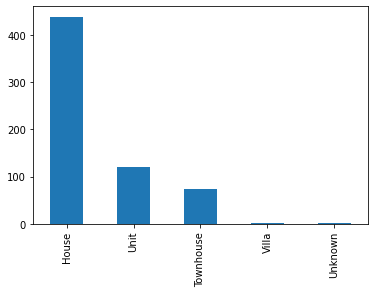

In [30]:
df['type'].value_counts().plot(kind='bar')

<AxesSubplot:>

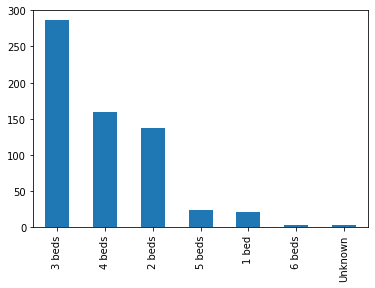

In [32]:
df['info'].value_counts().plot(kind='bar')